In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.size'] = 14
plt.rcParams['axes.titlesize'] = 14

In [2]:
# Some example parameters to make simulated tympanograms
example_values = {
    'A': [   0, 1.0, 1.00, 2e-3, 5e-4],
    'B': [-150, 1.3, 0.08, 2e-3, 8e-5],
    'C': [-210, 1.3, 0.60, 2e-3, 5e-4],
}

In [3]:
MIC_DATA_LEN = 200
def gen_sim_tracing(tpp=0, ecv=1.0, sa=1.0, zeta=2e-3, slope=5e-4):
    """An analytic formula for generating simulated tympanograms"""
    p = np.linspace(-399, 200, MIC_DATA_LEN)
    atm = 1e5 / 10  # 1 atm in decaPascals
    a = 1 / (1 + (tpp - p)**2 / (zeta**2 * (2*atm + tpp + p)**2))
    a200 = a[-1]
    amax = sa / (1 - a200)
    a *= amax
    a += ecv - amax * a200
    a += slope * (p - tpp) * (p < tpp)
    return p, a

Pressure: [-399,-395,-392,-389,-386,-383,-380,-377,-374,-371,-368,-365,-362,-359,
 -356,-353,-350,-347,-344,-341,-338,-335,-332,-329,-326,-323,-320,-317,
 -314,-311,-308,-305,-302,-299,-296,-293,-290,-287,-284,-281,-278,-275,
 -272,-269,-266,-263,-260,-257,-254,-251,-248,-245,-242,-239,-236,-233,
 -230,-227,-224,-221,-218,-215,-212,-209,-206,-203,-200,-197,-194,-191,
 -188,-185,-182,-179,-176,-173,-170,-167,-164,-161,-158,-155,-152,-149,
 -146,-143,-140,-137,-134,-131,-128,-125,-122,-119,-116,-113,-110,-107,
 -104,-101, -97, -94, -91, -88, -85, -82, -79, -76, -73, -70, -67, -64,
  -61, -58, -55, -52, -49, -46, -43, -40, -37, -34, -31, -28, -25, -22,
  -19, -16, -13, -10,  -7,  -4,  -1,   1,   4,   7,  10,  13,  16,  19,
   22,  25,  28,  31,  34,  37,  40,  43,  46,  49,  52,  55,  58,  61,
   64,  67,  70,  73,  76,  79,  82,  85,  88,  91,  94,  97, 100, 103,
  106, 109, 112, 115, 118, 121, 124, 127, 130, 133, 136, 139, 142, 145,
  148, 151, 154, 157, 160, 163, 166, 169, 172, 175, 17

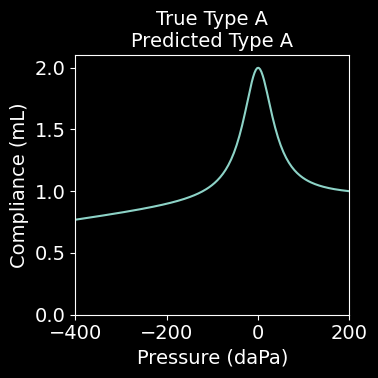

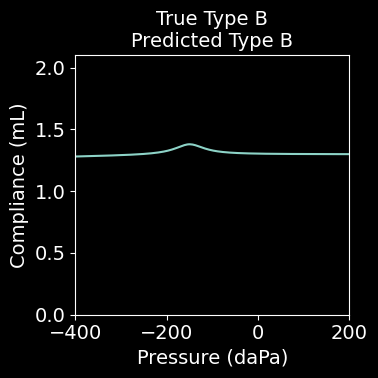

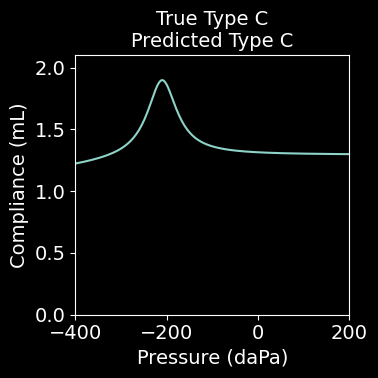

In [7]:
COMPLIANCE_SCALE = 100
for key in example_values:
    # Generate tympanometry data
    pressure, compliance = gen_sim_tracing(*example_values[key])
    
    if (key == 'A'):
        print(f"Pressure: {np.array2string(pressure.astype(int), separator=',')}")
        print(f"Compliance: {np.array2string((COMPLIANCE_SCALE*compliance).astype(int), separator=',')}")
    
    # Plot tympanogram, ECV, and TPP
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.plot(pressure, compliance)
        
    plt.xlim([-400, 200])
    plt.ylim([0.0, 2.1])
    plt.xlabel('Pressure (daPa)')
    plt.ylabel('Compliance (mL)')
    plt.title(f'True Type {key}\nPredicted Type {key}')
    plt.tight_layout()
    plt.show()